In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_excel('1- DoE and Data.xlsx')

In [3]:
df.head()

,StdOrder,RunOrder,Layer Height,Exposure Time,Light Off Delay,Orientation,Time,Diameter,Length,Height 1,Square Pin Width,Square Pin Length,Height 2,Surface Roughness
0,35,1,0.050,2.25,12,Z,137,4.077,12.035,3.080,2.005,2.125,7.040,2.2
1,10,2,0.075,2.50,12,X,93,4.202,11.935,3.005,2.015,1.975,7.055,1.9
2,2,3,0.100,2.00,13,X,74,4.128,12.020,3.110,2.115,2.070,7.090,2.5
3,31,4,0.050,2.00,13,Z,143,4.148,11.970,3.100,1.975,2.070,7.010,2.0
4,36,5,0.100,2.25,12,Z,70,3.885,12.150,3.215,1.860,2.045,7.010,5.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StdOrder           45 non-null     int64  
 1   RunOrder           45 non-null     int64  
 2   Layer Height       45 non-null     float64
 3   Exposure Time      45 non-null     float64
 4   Light Off Delay    45 non-null     int64  
 5   Orientation        45 non-null     object 
 6   Time               45 non-null     int64  
 7   Diameter           45 non-null     float64
 8   Length             45 non-null     float64
 9   Height 1           45 non-null     float64
 10  Square Pin Width   45 non-null     float64
 11  Square Pin Length  45 non-null     float64
 12  Height 2           45 non-null     float64
 13  Surface Roughness  45 non-null     float64
dtypes: float64(9), int64(4), object(1)
memory usage: 5.0+ KB


In [5]:
np.sum(df.isna())

StdOrder             0
RunOrder             0
Layer Height         0
Exposure Time        0
Light Off Delay      0
Orientation          0
Time                 0
Diameter             0
Length               0
Height 1             0
Square Pin Width     0
Square Pin Length    0
Height 2             0
Surface Roughness    0
dtype: int64

In [6]:
df.columns

Index(['StdOrder', 'RunOrder', 'Layer Height', 'Exposure Time',
       'Light Off Delay', 'Orientation', 'Time', 'Diameter', 'Length',
       'Height 1', 'Square Pin Width', 'Square Pin Length', 'Height 2',
       'Surface Roughness'],
      dtype='object')

In [7]:
df.drop(['StdOrder', 'RunOrder','Time','Height 1', 'Square Pin Width', 'Square Pin Length'],axis=1,inplace=True)

In [8]:
df.head()

,Layer Height,Exposure Time,Light Off Delay,Orientation,Diameter,Length,Height 2,Surface Roughness
0,0.050,2.25,12,Z,4.077,12.035,7.040,2.2
1,0.075,2.50,12,X,4.202,11.935,7.055,1.9
2,0.100,2.00,13,X,4.128,12.020,7.090,2.5
3,0.050,2.00,13,Z,4.148,11.970,7.010,2.0
4,0.100,2.25,12,Z,3.885,12.150,7.010,5.2


In [9]:
df1=df.copy()

In [10]:
df1['Diameter']=df1['Diameter']-4
df1['Length']=df1['Length']-12
df1['Height 2']=df1['Height 2']-7


In [11]:
df1.head()

,Layer Height,Exposure Time,Light Off Delay,Orientation,Diameter,Length,Height 2,Surface Roughness
0,0.050,2.25,12,Z,0.077,0.035,0.040,2.2
1,0.075,2.50,12,X,0.202,-0.065,0.055,1.9
2,0.100,2.00,13,X,0.128,0.020,0.090,2.5
3,0.050,2.00,13,Z,0.148,-0.030,0.010,2.0
4,0.100,2.25,12,Z,-0.115,0.150,0.010,5.2


In [12]:
cols= ['Diameter', 'Length', 'Height 2']
for i in cols:
    try:
        df1.drop(df1[df1[i]==0].index[0],axis=0,inplace=True)
    except:
        df1

In [13]:
df1.rename(columns={'Layer Height':'lr_h','Exposure Time':'exp_t','Light Off Delay':'lod','Orientation':'orient',
                   'Diameter':'D1','Length':'L1','Height 2':'H2'},inplace=True)

In [14]:
df1.columns

Index(['lr_h', 'exp_t', 'lod', 'orient', 'D1', 'L1', 'H2',
       'Surface Roughness'],
      dtype='object')

In [15]:
df1.head()

,lr_h,exp_t,lod,orient,D1,L1,H2,Surface Roughness
0,0.050,2.25,12,Z,0.077,0.035,0.040,2.2
1,0.075,2.50,12,X,0.202,-0.065,0.055,1.9
2,0.100,2.00,13,X,0.128,0.020,0.090,2.5
3,0.050,2.00,13,Z,0.148,-0.030,0.010,2.0
4,0.100,2.25,12,Z,-0.115,0.150,0.010,5.2


# Linear Regression model 


In [16]:
x= df1[['D1','L1', 'H2']]
y= df1.lr_h

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model =LinearRegression()

lr_model.fit(x_train,y_train)
y_pred=lr_model.predict([[0,0,0]])
test_dataframe= {}
MSE=mean_squared_error(y_test,lr_model.predict(x_test))
test_dataframe['linear regression']=MSE, y_pred[0]
MSE, y_pred

(0.00028007441453849126, array([0.07835812]))

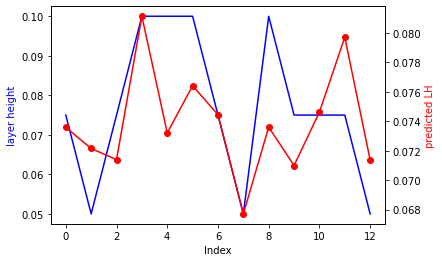

<Figure size 720x1080 with 0 Axes>

In [17]:
x_test_=lr_model.predict(x_test)
y= y_test
y1= x_test_
x= np.linspace(0,12,num=13)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(x, y,'-b')
ax2.plot(x, y1, 'o-', color="red" )

ax1.set_xlabel('Index')
ax1.set_ylabel('layer height', color='b')
ax2.set_ylabel('predicted LH', color='r')
plt.show();

# Ridge Regression

In [18]:
x= df1[['D1','L1', 'H2']]
y= df1.lr_h

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge_reg_model =Ridge()

ridge_reg_model.fit(x_train,y_train)
y_pred=ridge_reg_model.predict([[0,0,0]])
MSE=mean_squared_error(y_test,ridge_reg_model.predict(x_test))
test_dataframe['ridge regression']=MSE, y_pred[0]
MSE, y_pred

(0.00033618658837323336, array([0.07373719]))

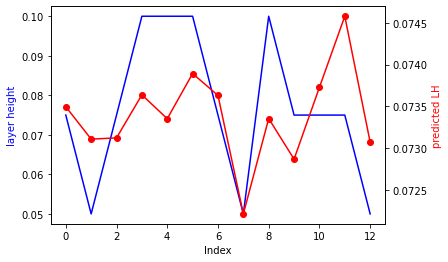

<Figure size 720x1080 with 0 Axes>

In [19]:
x_test_=ridge_reg_model.predict(x_test)
y= y_test
y1= x_test_
x= np.linspace(0,12,num=13)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(x, y,'-b')
ax2.plot(x, y1, 'o-', color="red" )

ax1.set_xlabel('Index')
ax1.set_ylabel('layer height', color='b')
ax2.set_ylabel('predicted LH', color='r')
plt.show();

# DecisionTreeRegression

In [20]:
x= df1[['D1','L1', 'H2']]
y= df1.lr_h

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dec_tree_model =DecisionTreeRegressor()

dec_tree_model.fit(x_train,y_train)
y_pred=dec_tree_model.predict([[0,0,0]])
MSE=mean_squared_error(y_test,dec_tree_model.predict(x_test))
test_dataframe['decision tree regressor']=MSE, y_pred[0]
MSE, y_pred

(0.00038461538461538456, array([0.1]))

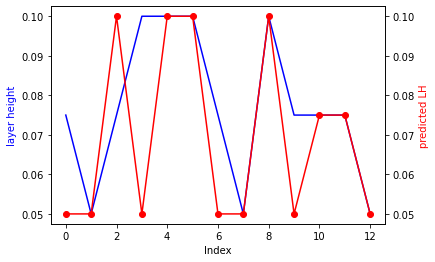

<Figure size 720x1080 with 0 Axes>

In [21]:
x_test_=dec_tree_model.predict(x_test)
y= y_test
y1= x_test_
x= np.linspace(0,12,num=13)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(x, y,'-b')
ax2.plot(x, y1, 'o-', color="red" )

ax1.set_xlabel('Index')
ax1.set_ylabel('layer height', color='b')
ax2.set_ylabel('predicted LH', color='r')
plt.show();

# RandomForestRegressor

In [22]:
x= df1[['D1','L1', 'H2']]
y= df1.lr_h

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
random_forest =RandomForestRegressor()

random_forest.fit(x_train,y_train)
y_pred=random_forest.predict([[0,0,0]])
MSE=mean_squared_error(y_test,random_forest.predict(x_test))
test_dataframe['random forest regressor']=MSE, y_pred[0]
MSE, y_pred

(0.00027114423076923143, array([0.0875]))

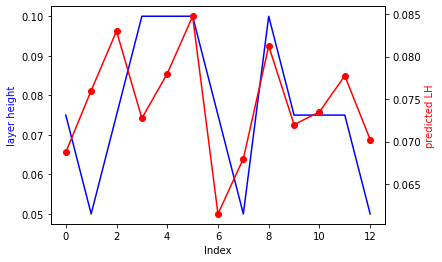

<Figure size 720x1080 with 0 Axes>

In [23]:
x_test_=random_forest.predict(x_test)
y= y_test
y1= x_test_
x= np.linspace(0,12,num=13)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(x, y,'-b')
ax2.plot(x, y1, 'o-', color="red" )

ax1.set_xlabel('Index')
ax1.set_ylabel('layer height', color='b')
ax2.set_ylabel('predicted LH', color='r')
plt.show();

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
dnn_model= keras.Sequential([
    keras.layers.Dense(3,input_shape=(3,),activation='relu'),
    keras.layers.Dense(2,activation='tanh'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [26]:
dnn_model.compile(keras.optimizers.SGD(),
                 keras.losses.mean_squared_error)

In [27]:
x= df1[['D1','L1', 'H2']]
y= df1.lr_h

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
dnn_model.fit(x_train,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 461ms/step - loss: 0.1735
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1723
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1711
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1699
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1687
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1675
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1663
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1651
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1639
Epoch 10/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1627
Epoch 11/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1614
Epoch 12/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.1602
Epoch 13/2000
1/1 [============================

1/1 [==============================] - 0s 5ms/step - loss: 0.0786
Epoch 104/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0781
Epoch 105/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0775
Epoch 106/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0770
Epoch 107/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 108/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0759
Epoch 109/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0754
Epoch 110/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0749
Epoch 111/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 112/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0739
Epoch 113/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0734
Epoch 114/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0729
Epoch 115/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0428
Epoch 205/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0426
Epoch 206/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0424
Epoch 207/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0422
Epoch 208/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0420
Epoch 209/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0417
Epoch 210/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0415
Epoch 211/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 212/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0411
Epoch 213/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0409
Epoch 214/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0407
Epoch 215/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0405
Epoch 216/2000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0272
Epoch 306/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0271
Epoch 307/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0270
Epoch 308/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0269
Epoch 309/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 310/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0266
Epoch 311/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 312/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0264
Epoch 313/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0263
Epoch 314/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0262
Epoch 315/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0261
Epoch 316/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0260
Epoch 317/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 407/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 408/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0188
Epoch 409/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0187
Epoch 410/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0187
Epoch 411/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 412/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 413/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 414/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 415/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 416/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 417/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 418/2000
1/1 [======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 508/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 509/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 510/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 511/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 512/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 513/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 514/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0137
Epoch 515/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137
Epoch 516/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 517/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 518/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 519/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 609/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 610/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 611/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 612/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 613/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 614/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 615/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 616/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 617/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 618/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 619/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 620/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0086
Epoch 710/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 711/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 712/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 713/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 714/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0085
Epoch 715/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 716/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 717/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 718/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 719/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 720/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 721/2000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 811/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 812/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 813/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 814/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 815/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 816/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 817/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 818/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 819/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 820/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 821/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 822/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 912/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 913/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 914/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 915/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 916/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 917/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 918/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 919/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0058
Epoch 920/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 921/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 922/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 923/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 1013/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 1014/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 1015/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 1016/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 1017/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 1018/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 1019/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 1020/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 1021/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 1022/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 1023/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 1024/2000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 1113/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 1114/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0042
Epoch 1115/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 1116/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 1117/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 1118/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0042
Epoch 1119/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 1120/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 1121/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 1122/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 1123/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 1124/2000
1/1 [=========

Epoch 1212/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.0037
Epoch 1213/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 1214/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 1215/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 1216/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 1217/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 1218/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0036
Epoch 1219/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 1220/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 1221/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 1222/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 1223/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 1224/200

1/1 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 1312/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 1313/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 1314/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.0032
Epoch 1315/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 1316/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 1317/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 1318/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 1319/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 1320/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 1321/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 1322/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 1323/2000
1/1 [==========

1/1 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 1412/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 1413/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 1414/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.0028
Epoch 1415/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 1416/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 1417/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 1418/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 1419/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 1420/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 1421/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 1422/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 1423/2000
1/1 [==========

1/1 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 1512/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 1513/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 1514/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 1515/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 1516/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 1517/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 1518/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 1519/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 1520/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 1521/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 1522/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 1523/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 1612/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 1613/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 1614/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 1615/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 1616/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 1617/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 1618/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 1619/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 1620/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 1621/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 1622/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 1623/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 1712/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 1713/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 1714/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 1715/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 1716/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 1717/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 1718/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 1719/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 1720/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 1721/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 1722/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 1723/2000
1/1 [===========

1/1 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 1812/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 1813/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1814/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 1815/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 1816/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 1817/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 1818/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 1819/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 1820/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 1821/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 1822/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 1823/2000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 1912/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 1913/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 1914/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 1915/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 1916/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 1917/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 1918/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 1919/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 1920/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 1921/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 1922/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 1923/2000
1/1 [===========

In [28]:
MSE=dnn_model.evaluate(x_test,y_test)
y_pred=dnn_model.predict([[0,0,0]])

1/1 [==============================] - 0s 293ms/step


1/1 [==============================] - 0s 119ms/step


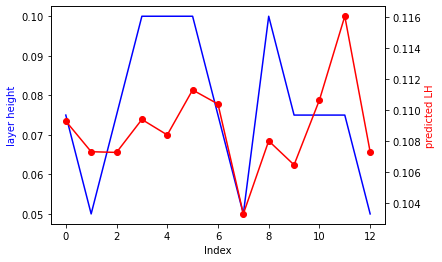

<Figure size 720x1080 with 0 Axes>

In [29]:
x_test_=dnn_model.predict(x_test)
y= y_test
y1= x_test_
x= np.linspace(0,12,num=13)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(x, y,'-b')
ax2.plot(x, y1, 'o-', color="red" )

ax1.set_xlabel('Index')
ax1.set_ylabel('layer height', color='b')
ax2.set_ylabel('predicted LH', color='r')
plt.show();

In [30]:
test_df=pd.DataFrame(data=test_dataframe,index=['MSE_LH','Layer Height']).T
test_df

,MSE_LH,Layer Height
linear regression,0.000280,0.078358
ridge regression,0.000336,0.073737
decision tree regressor,0.000385,0.100000
random forest regressor,0.000271,0.087500


# Linear Regression model 
### Input parameters are - variation in Diameter, Length, Height
### Output parameter is Exposure Time

In [31]:
df1.exp_t=df1.exp_t/2.5

In [32]:
x= df1[['D1','L1', 'H2']]
y= df1.exp_t

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model =LinearRegression()

lr_model.fit(x_train,y_train)
y_pred=lr_model.predict([[0,0,0]])*2.5
test_dataframe_exp_t= {}
MSE=mean_squared_error(y_test,lr_model.predict(x_test))
test_dataframe_exp_t['linear regression']=MSE, y_pred[0]
MSE, y_pred

(0.006012057632746802, array([2.18973365]))

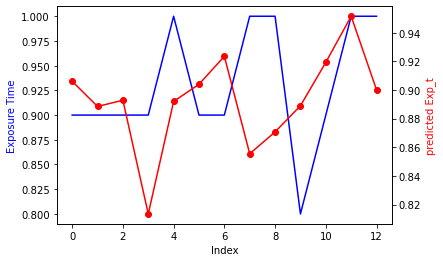

<Figure size 720x1080 with 0 Axes>

In [33]:
x_test_=lr_model.predict(x_test)
y= y_test
y1= x_test_
x= np.linspace(0,12,num=13)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(x, y,'-b')
ax2.plot(x, y1, 'o-', color="red" )

ax1.set_xlabel('Index')
ax1.set_ylabel('Exposure Time', color='b')
ax2.set_ylabel('predicted Exp_t', color='r')
plt.show();

# Ridge Regression

In [34]:
x= df1[['D1','L1', 'H2']]
y= df1.exp_t

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge_reg_model =Ridge()

ridge_reg_model.fit(x_train,y_train)
y_pred=ridge_reg_model.predict([[0,0,0]])*2.5
MSE=mean_squared_error(y_test,ridge_reg_model.predict(x_test))
test_dataframe_exp_t['ridge regression']=MSE, y_pred[0]
MSE, y_pred

(0.005288383077735191, array([2.22772598]))

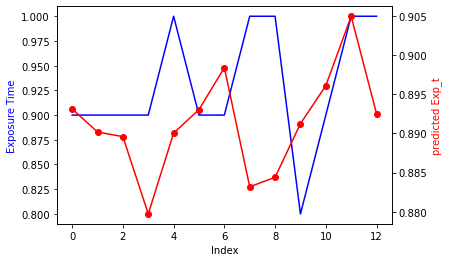

<Figure size 720x1080 with 0 Axes>

In [35]:
x_test_=ridge_reg_model.predict(x_test)
y= y_test
y1= x_test_
x= np.linspace(0,12,num=13)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(x, y,'-b')
ax2.plot(x, y1, 'o-', color="red" )
ax1.set_xlabel('Index')
ax1.set_ylabel('Exposure Time', color='b')
ax2.set_ylabel('predicted Exp_t', color='r')
plt.show();

# DecisionTreeRegression

In [36]:
x= df1[['D1','L1', 'H2']]
y= df1.exp_t

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dec_tree_model =DecisionTreeRegressor()

dec_tree_model.fit(x_train,y_train)
y_pred=dec_tree_model.predict([[0,0,0]])*2.5
MSE=mean_squared_error(y_test,dec_tree_model.predict(x_test))
test_dataframe_exp_t['decision tree regressor']=MSE, y_pred[0]
MSE, y_pred

(0.009999999999999993, array([2.5]))

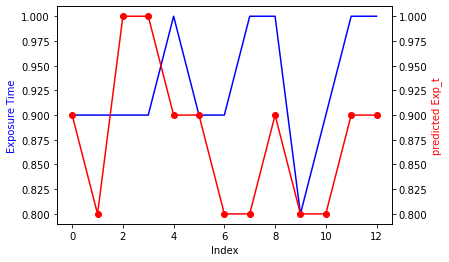

<Figure size 720x1080 with 0 Axes>

In [37]:
x_test_=dec_tree_model.predict(x_test)
y= y_test
y1= x_test_
x= np.linspace(0,12,num=13)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(x, y,'-b')
ax2.plot(x, y1, 'o-', color="red" )
ax1.set_xlabel('Index')
ax1.set_ylabel('Exposure Time', color='b')
ax2.set_ylabel('predicted Exp_t', color='r')
plt.show();

# RandomForestRegressor

In [38]:
x= df1[['D1','L1', 'H2']]
y= df1.exp_t

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
random_forest =RandomForestRegressor()

random_forest.fit(x_train,y_train)
y_pred=random_forest.predict([[0,0,0]])*2.5
MSE=mean_squared_error(y_test,random_forest.predict(x_test))
test_dataframe_exp_t['random forest regressor']=MSE, y_pred[0]
MSE, y_pred

(0.007760923076923116, array([2.4075]))

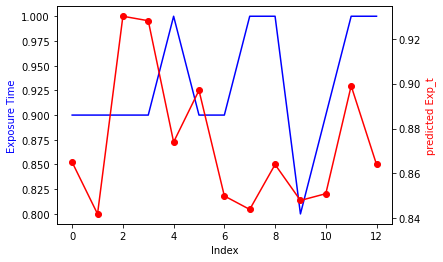

<Figure size 720x1080 with 0 Axes>

In [39]:
x_test_=random_forest.predict(x_test)
y= y_test
y1= x_test_
x= np.linspace(0,12,num=13)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(x, y,'-b')
ax2.plot(x, y1, 'o-', color="red" )
ax1.set_xlabel('Index')
ax1.set_ylabel('Exposure Time', color='b')
ax2.set_ylabel('predicted Exp_t', color='r')
plt.show();

In [40]:
test_df_exp_t= pd.DataFrame(data=test_dataframe_exp_t,index=['MSE_ET','Exposure Time']).T
test_df_exp_t

,MSE_ET,Exposure Time
linear regression,0.006012,2.189734
ridge regression,0.005288,2.227726
decision tree regressor,0.010000,2.500000
random forest regressor,0.007761,2.407500


# Linear Regression model 
### Input parameters are - variation in Diameter, Length, Height
### Output parameter is Light Off Delay

In [41]:
df1.lod=df1.lod/14

In [42]:
x= df1[['D1','L1', 'H2']]
y= df1.lod

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model =LinearRegression()

lr_model.fit(x_train,y_train)
y_pred=lr_model.predict([[0,0,0]])*14
test_dataframe_lod= {}
MSE=mean_squared_error(y_test,lr_model.predict(x_test))
test_dataframe_lod['linear regression']=MSE, y_pred[0]
MSE, y_pred

(0.0018230749149106748, array([12.8106254]))

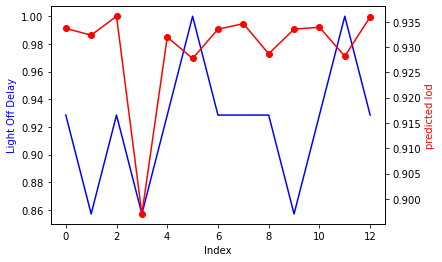

<Figure size 720x1080 with 0 Axes>

In [43]:
x_test_=lr_model.predict(x_test)
y= y_test
y1= x_test_
x= np.linspace(0,12,num=13)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(x, y,'-b')
ax2.plot(x, y1, 'o-', color="red" )
ax1.set_xlabel('Index')
ax1.set_ylabel('Light Off Delay', color='b')
ax2.set_ylabel('predicted lod', color='r')
plt.show();

# Ridge Regression

In [44]:
x= df1[['D1','L1', 'H2']]
y= df1.lod

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge_reg_model =Ridge()

ridge_reg_model.fit(x_train,y_train)
y_pred=ridge_reg_model.predict([[0,0,0]])*14
MSE=mean_squared_error(y_test,ridge_reg_model.predict(x_test))
test_dataframe_lod['ridge regression']=MSE, y_pred[0]
MSE, y_pred

(0.0019859868281547053, array([13.02174144]))

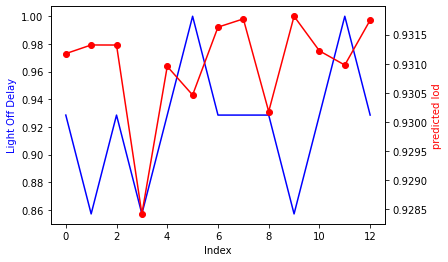

<Figure size 720x1080 with 0 Axes>

In [45]:
x_test_=ridge_reg_model.predict(x_test)
y= y_test
y1= x_test_
x= np.linspace(0,12,num=13)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(x, y,'-b')
ax2.plot(x, y1, 'o-', color="red" )
ax1.set_xlabel('Index')
ax1.set_ylabel('Light Off Delay', color='b')
ax2.set_ylabel('predicted lod', color='r')
plt.show();

# DecisionTreeRegressor

In [46]:
x= df1[['D1','L1', 'H2']]
y= df1.lod

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dec_tree_model =DecisionTreeRegressor()

dec_tree_model.fit(x_train,y_train)
y_pred=dec_tree_model.predict([[0,0,0]])*14
MSE=mean_squared_error(y_test,dec_tree_model.predict(x_test))
test_dataframe_lod['decision tree regressor']=MSE, y_pred[0]
MSE, y_pred

(0.0027472527472527488, array([12.]))

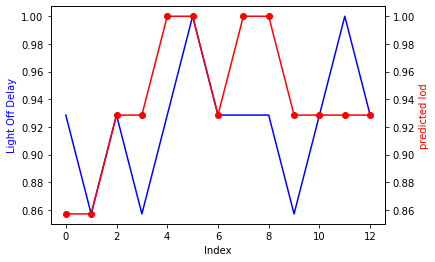

<Figure size 720x1080 with 0 Axes>

In [47]:
x_test_=dec_tree_model.predict(x_test)
y= y_test
y1= x_test_
x= np.linspace(0,12,num=13)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(x, y,'-b')
ax2.plot(x, y1, 'o-', color="red" )
ax1.set_xlabel('Index')
ax1.set_ylabel('Light Off Delay', color='b')
ax2.set_ylabel('predicted lod', color='r')
plt.show();

In [48]:
x= df1[['D1','L1', 'H2']]
y= df1.lod

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
random_forest =RandomForestRegressor()

random_forest.fit(x_train,y_train)
y_pred=random_forest.predict([[0,0,0]])*14
MSE=mean_squared_error(y_test,random_forest.predict(x_test))
test_dataframe_lod['random forest regressor']=MSE, y_pred[0]
MSE, y_pred

(0.0018331632653061304, array([12.75]))

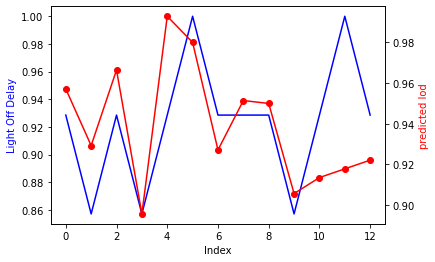

<Figure size 720x1080 with 0 Axes>

In [49]:
x_test_=random_forest.predict(x_test)
y= y_test
y1= x_test_
x= np.linspace(0,12,num=13)

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,15))
ax2 = ax1.twinx()
ax1.plot(x, y,'-b')
ax2.plot(x, y1, 'o-', color="red" )
ax1.set_xlabel('Index')
ax1.set_ylabel('Light Off Delay', color='b')
ax2.set_ylabel('predicted lod', color='r')
plt.show();

In [50]:
test_df_lod= pd.DataFrame(data=test_dataframe_lod,index=['MSE_LOD','Light Off Delay']).T
test_df_lod

,MSE_LOD,Light Off Delay
linear regression,0.001823,12.810625
ridge regression,0.001986,13.021741
decision tree regressor,0.002747,12.000000
random forest regressor,0.001833,12.750000


In [51]:
pd.concat([test_df,test_df_exp_t,test_df_lod],axis=1)

,MSE_LH,Layer Height,MSE_ET,Exposure Time,MSE_LOD,Light Off Delay
linear regression,0.000280,0.078358,0.006012,2.189734,0.001823,12.810625
ridge regression,0.000336,0.073737,0.005288,2.227726,0.001986,13.021741
decision tree regressor,0.000385,0.100000,0.010000,2.500000,0.002747,12.000000
random forest regressor,0.000271,0.087500,0.007761,2.407500,0.001833,12.750000
